In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from collections import  Counter

import torch
from fastai.vision import *
from fastai.metrics import *

np.random.seed(7)
torch.cuda.manual_seed_all(7)

import os

In [ ]:
test_df = pd.read_csv('test_ApKoW4T.csv')
test_df.head()

In [ ]:
databunch = ImageDataBunch.from_csv(Path('images'), ds_tfms=get_transforms(),
                                  csv_labels='cleaned.csv',
                                  valid_pct=0.0,
                                size=(140,210), bs=64).normalize(imagenet_stats)

# Add the test images to the DataBunch
test_img = ImageList.from_df(test_df, path='/home/jupyter/analytics_vidhya',
                             folder='test')
databunch.add_test(test_img)

In [ ]:
learner = cnn_learner(databunch, models.resnet101, metrics=accuracy)
learner.load('stage-3-resnet101')

In [6]:
import time

def prepare_submission_file(learner):
    ts = time.time()
    pred_labels = []

    for i in range(len(learner.data.test_ds)):
        temp_pred = str(learner.predict(learner.data.test_ds[i][0])[0])
        pred_labels.append(temp_pred)
    submission = pd.read_csv('Submission.csv')
    submission['category'] = pred_labels

    file_name = 'submission_{}.csv'.format(ts)
    submission.to_csv('Submission_Files/'+file_name, index=False)
    return 'Submission file created successfully here {}'.format('Submission_Files/'+file_name)

In [7]:
prepare_submission_file(learner)

'Submission file created successfully here Submission_Files/submission_1560091365.2565188.csv'

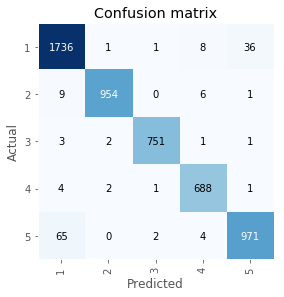

In [15]:
interp = ClassificationInterpretation.from_learner(learner, ds_type=DatasetType.Train)
interp.plot_confusion_matrix()

In [13]:
ds, idxs = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Train)
ImageCleaner(ds, idxs, path=Path('images'))

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

For reference:
```
{'Cargo': 1, 
'Military': 2, 
'Carrier': 3, 
'Cruise': 4, 
'Tankers': 5}
```

In [12]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_similars(learner, ds_type=DatasetType.Train)
ImageCleaner(ds, idxs, path=Path('images'), duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [16]:
databunch = ImageDataBunch.from_csv(Path('images'), ds_tfms=get_transforms(),
                                  csv_labels='cleaned.csv',
                                  valid_pct=0.0,
                                size=(140,210), bs=64).normalize(imagenet_stats)

# Add the test images to the DataBunch
test_img = ImageList.from_df(test_df, path='/home/jupyter/analytics_vidhya',
                             folder='test')
databunch.add_test(test_img)

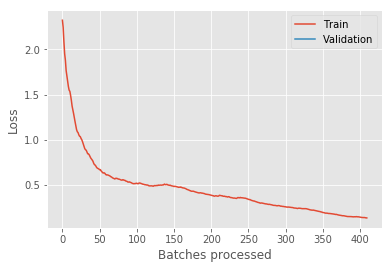

In [17]:
learner = cnn_learner(databunch, models.resnet101, metrics=accuracy)
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-04, 1e-02))
learner.recorder.plot_losses()

In [18]:
prepare_submission_file(learner)

'Submission file created successfully here Submission_Files/submission_1560093306.4613566.csv'

In [19]:
learner.save('stage-4-resnet101')

In [20]:
# Combining predictions
prepend = 'Submission_Files/'

submission_prefinal = pd.read_csv(prepend+'submission_1560091365.2565188.csv')
submission_final = pd.read_csv(prepend+'submission_1560093306.4613566.csv')
             
submission_combined = submission_three.copy()
submission_combined['category'] = pd.concat([submission_prefinal.category, 
                                             submission_final],
                                             axis=1).max(axis=1)
file_name = 'submission_{}.csv'.format(time.time())
submission_combined.to_csv('Submission_Files/'+file_name, index=False)            